### YouTube Statistical Analysis ###

1. Sentiment Analysis in a variety of forms
2. Categorizing youtube content in variety of forms
3. Analysing factors how popular your video will be
4. statistical analysis overall time

In [1]:
#import necessary libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json

%matplotlib inline

In [2]:
#read the data

data_US_region = pd.read_csv('F:/Pucho-DataAnalysis/Round-1/youtube-new/USvideos.csv')

In [3]:
data_US_columns = list(data_US_region.columns.values) #get the columns we want
data_US_columns

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [4]:
data_US_region.shape #csv files has 35349 rows and 16 columns

(35349, 16)

In [5]:
data_US_region.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
#now we going to read json file to map its categories

blank_category = {} #hold data extracted from the json file

with open("F:/Pucho-DataAnalysis/Round-1/youtube-new/US_category_id.json") as fp:
    data = json.load(fp)
    
    for category in data["items"]:
        blank_category[category["id"]] = category["snippet"]["title"] #stores category id and its type

In [7]:
blank_category

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
#now convert trending_date and publishing time into standard dataframe
data_US_region["trending_date"] = pd.to_datetime(data_US_region["trending_date"],format = "%y.%d.%m")
data_US_region["publish_time"] = pd.to_datetime(data_US_region["publish_time"])

In [9]:
data_US_region.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
#now  creating new columns for each category to get efficent insights in efficient manner
data_US_region["Trending_year"] = data_US_region["trending_date"].apply(lambda time :time.year)
data_US_region["Trending_month"] = data_US_region["trending_date"].apply(lambda time:time.month)
data_US_region["Trending_day"] = data_US_region["trending_date"].apply(lambda time:time.day)
data_US_region["Trending_dayofweek"] = data_US_region["trending_date"].apply(lambda time:time.dayofweek)

In [11]:
data_US_region.shape

(35349, 20)

In [12]:
data_US_region.iloc[1:5,-4:]

,Trending_year,Trending_month,Trending_day,Trending_dayofweek
1,2017,11,14,1
2,2017,11,14,1
3,2017,11,14,1
4,2017,11,14,1


In [13]:
data_US_region["Publish year"] = data_US_region["publish_time"].apply(lambda time:time.year)
data_US_region["Publish_month"] = data_US_region["publish_time"].apply(lambda time:time.month)
data_US_region["Publish_day"] = data_US_region["publish_time"].apply(lambda time:time.day)
data_US_region["Publish_dayofweek"] = data_US_region["publish_time"].apply(lambda time:time.dayofweek)

data_US_region.shape #(35349,24)

(35349, 24)

In [14]:
#now dayofweek is in numeric format so we need to convert into day
dmap = {0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

#using this dictionary now we are going to map our column
data_US_region["Publish_dayofweek"] = data_US_region["Publish_dayofweek"].map(dmap)
data_US_region["Trending_dayofweek"] = data_US_region["Trending_dayofweek"].map(dmap)

In [15]:
data_US_region["Publish_dayofweek"].head(5) #now we have converted numerical into days of week

0    Mon
1    Mon
2    Sun
3    Mon
4    Sun
Name: Publish_dayofweek, dtype: object

In [16]:
#now check the dataset for missing values
data_US_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 24 columns):
video_id                  35349 non-null object
trending_date             35349 non-null datetime64[ns]
title                     35349 non-null object
channel_title             35349 non-null object
category_id               35349 non-null int64
publish_time              35349 non-null datetime64[ns]
tags                      35349 non-null object
views                     35349 non-null int64
likes                     35349 non-null int64
dislikes                  35349 non-null int64
comment_count             35349 non-null int64
thumbnail_link            35349 non-null object
comments_disabled         35349 non-null bool
ratings_disabled          35349 non-null bool
video_error_or_removed    35349 non-null bool
description               34844 non-null object
Trending_year             35349 non-null int64
Trending_month            35349 non-null int64
Trending_day            

In [17]:
#there is no null data in any column
#Now converting dataframe columns into suitable format

important_parameters = ["views likes dislikes comment_count".split()]

for columns in important_parameters:
    data_US_region[columns] = data_US_region[columns].astype(int) #to check if the data in the column is list

#we need to convert categorty id into string, because later we're going to map it with json data extracted from json file
category_list = ["category_id"]
for ctgry in category_list:
    data_US_region[ctgry] = data_US_region[ctgry].astype(str)

data_US_region["category"] = data_US_region["category_id"].map(blank_category)

In [18]:
data_US_region["category"].head() #now we have mapped and converted into string

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

In [19]:
#visualization

plt.style.use('ggplot')
plt.figure(figsize=(8,8))

data_US_region["Publish_hour"] = data_US_region["publish_time"].apply(lambda time:time.hour)
data_US_region.shape

(35349, 26)

<Figure size 576x576 with 0 Axes>

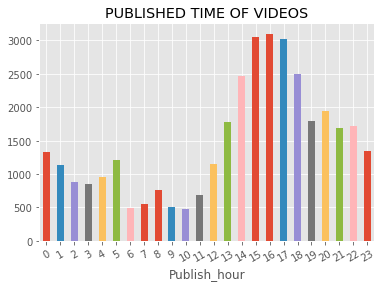

In [20]:
pub_hour = data_US_region.groupby("Publish_hour").count()["category"].plot.bar()
pub_hour.set_xticklabels(pub_hour.get_xticklabels(),rotation=30)
plt.title("PUBLISHED TIME OF VIDEOS")
sb.set_context(font_scale = 1) #x-axis indicates nth hour, y-axis indicates number of videos

Text(0.5,1,'CATEGORY WISE UPLOADS')

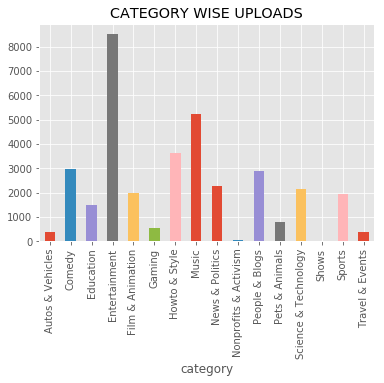

In [21]:
#now visualize which category has highest upload
data_US_region.groupby('category').count()["views"].plot.bar()
plt.title("CATEGORY WISE UPLOADS") #entertainment has highest category

In [22]:
plt.style.use('ggplot')

sb.set(rc={"figure.figsize":(20,10)})
data_US_region[data_US_region["category"] == "Entertainment"].shape

(8510, 26)

In [23]:
#so we have 8510,26 column shape in entertainment category
enter_cat = data_US_region[data_US_region["category"] == "Entertainment"]

top_10_ent = enter_cat.nlargest(10,'views')

print("TOP 10 VIDEOS FROM ENTERTAINMENT CATEGORY")
print(top_10_ent["views"],top_10_ent["title"])

TOP 10 VIDEOS FROM ENTERTAINMENT CATEGORY
6181    149376127
5935    137843120
5699    125432237
5452    113874632
5236    100911567
4997     91933007
4743     89930713
4514     87449453
4276     84281319
4043     80360459
Name: views, dtype: int32 6181    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
5935    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
5699    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
5452    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
5236    YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4997    Marvel Studios' Avengers: Infinity War Officia...
4743    Marvel Studios' Avengers: Infinity War Officia...
4514    Marvel Studios' Avengers: Infinity War Officia...
4276    Marvel Studios' Avengers: Infinity War Officia...
4043    Marvel Studios' Avengers: Infinity War Officia...
Name: title, dtype: object


C:\Users\Madhivarman\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'FILTERING OUT TRENDING AND NON TRENDING VIDEOS')

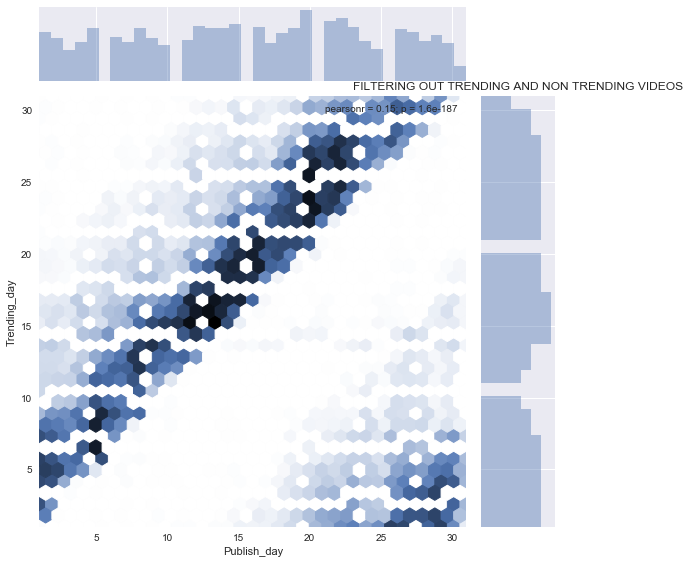

In [24]:
#as from the dataset we can see there are lot of duplicate vidoes are there in the trending across various days,
#we going to analyze each video according to trending days

trending_day = sb.jointplot(x="Publish_day",y="Trending_day",data=data_US_region,size=8,kind='hex')
plt.title("FILTERING OUT TRENDING AND NON TRENDING VIDEOS")

Text(0.5,1,'OCCURENCE OF VIDEO IN TERM OF VIDEO ID')

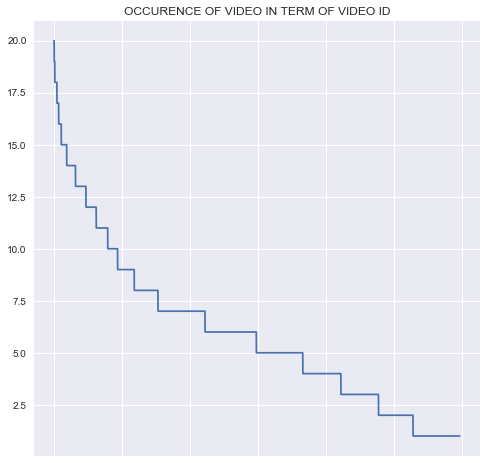

In [25]:
#occurence of the video in form of Id
plt.figure(figsize=(8,8))
video_id = data_US_region["video_id"].value_counts().plot()
video_id.set_xticklabels(video_id.get_xticklabels(),rotation=180)
plt.title("OCCURENCE OF VIDEO IN TERM OF VIDEO ID")

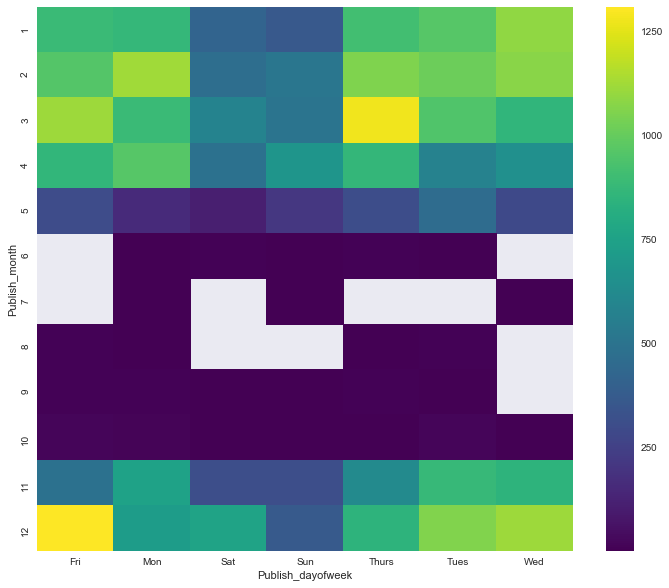

In [26]:
highest_month_upload = data_US_region.groupby(["Publish_month","Publish_dayofweek"]).count()["video_id"].unstack()
plt.figure(figsize=(12,10))
sb.heatmap(highest_month_upload,cmap='viridis')

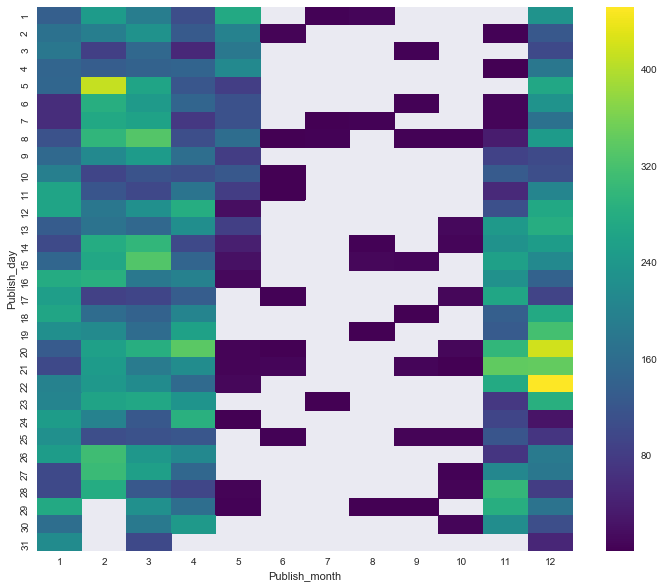

In [27]:
date_and_hour = data_US_region.groupby(["Publish_day","Publish_month"]).count()["video_id"].unstack()
plt.figure(figsize=(12,10))
sb.heatmap(date_and_hour,cmap='viridis')

From two heat map we can say that, In first heat map **Decemeber** month there are around 1250 uploads, in **april month thursday** there are highest upload and other day has moderate upload. In second heat map **On day 22 December month** there are high uploads, and **July Month** there are very few uploads(below 80) on day 7 and mostly null uploads on **day 7**

Text(0.5,1,'MOST WATCHED VIDEO ON YOUTUBE')

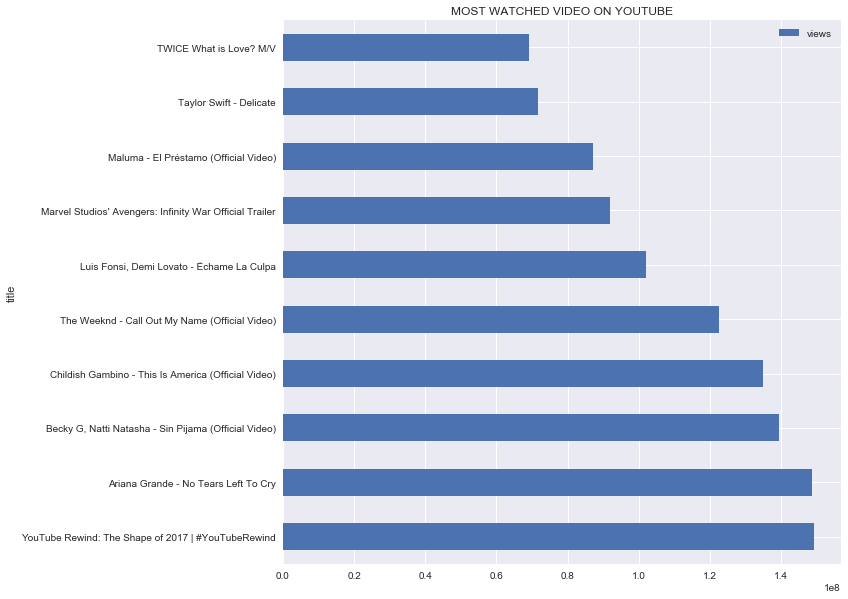

In [28]:
#lets find out top 10 most watched video

most_watched_video = data_US_region[["title","views"]].sort_values(by="views",ascending=True)
most_watched_video.drop_duplicates("title",keep="last",inplace=True) #remove duplicates

most_watched = most_watched_video.sort_values(by="views",ascending=False)
most_watched = most_watched.head(10)
most_watched.set_index("title",inplace=True)

plt.style.use('ggplot')
sb.set(rc={"figure.figsize":(10,10)})
most_watched.plot.barh() #bar horizontally
plt.title('MOST WATCHED VIDEO ON YOUTUBE')

In [29]:
#lets check some insights from Most watched Video
insight_most_watched = data_US_region[data_US_region["title"].str.match("YouTube Rewind")]
insight_most_watched

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,Trending_year,Trending_month,Trending_day,Trending_dayofweek,Publish year,Publish_month,Publish_day,Publish_dayofweek,category,Publish_hour
4600,FlsCjmMhFmw,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,...,2017,12,7,Thurs,2017,12,6,Wed,Entertainment,17
4801,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891799,884944,...,2017,12,8,Fri,2017,12,6,Wed,Entertainment,17
5020,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251797,1127798,...,2017,12,9,Sat,2017,12,6,Wed,Entertainment,17
5236,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,...,2017,12,10,Sun,2017,12,6,Wed,Entertainment,17
5452,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,...,2017,12,11,Mon,2017,12,6,Wed,Entertainment,17
5699,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,...,2017,12,12,Tues,2017,12,6,Wed,Entertainment,17
5935,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,...,2017,12,13,Wed,2017,12,6,Wed,Entertainment,17
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,...,2017,12,14,Thurs,2017,12,6,Wed,Entertainment,17


Text(0.5,1,'TRENDING DAYS V/S LIKE')

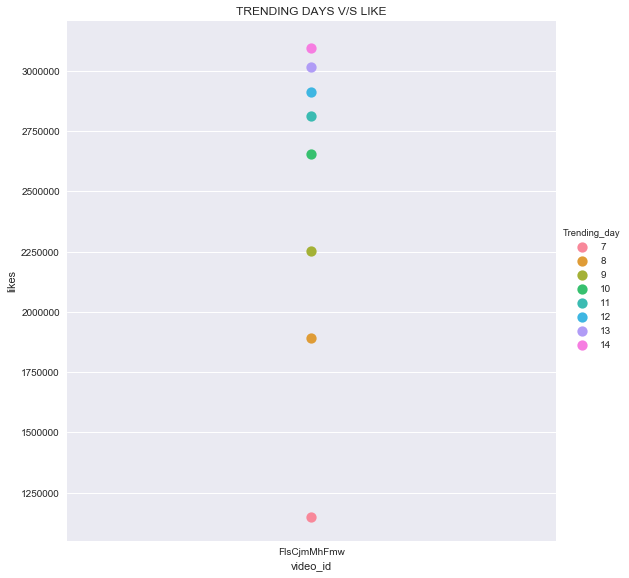

In [30]:
sb.factorplot(x="video_id",y="likes",hue="Trending_day",data=insight_most_watched,size=8,kind="point")
plt.title("TRENDING DAYS V/S LIKE")

Text(0.5,1,'TRENDING DAYS AND VIEW ANALYSIS WITH RESPECT TO PUBLISH DAY')

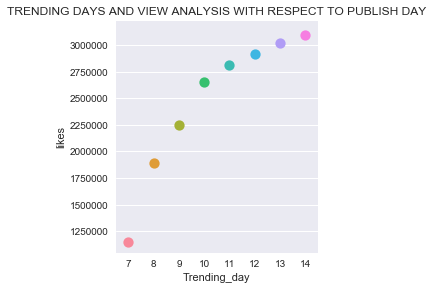

In [31]:
sb.factorplot(x="Trending_day",y="likes",hue="Trending_day",data=insight_most_watched,kind="point")
plt.title("TRENDING DAYS AND VIEW ANALYSIS WITH RESPECT TO PUBLISH DAY") #after 14th day, likes will increase slowly

Text(0.5,1,'DISLIKE INCREASING WITH RESPECT TO THE TRENDING DAYS')

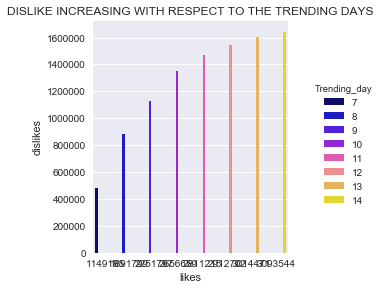

In [32]:
#now lets analyse the dislikes
sb.factorplot(x="likes",y="dislikes",hue="Trending_day",data=insight_most_watched,kind="bar",palette="gnuplot2")
plt.title("DISLIKE INCREASING WITH RESPECT TO THE TRENDING DAYS")

Text(0.5,1,'COMMENTS WITH RESPECT TO THE VIEW')

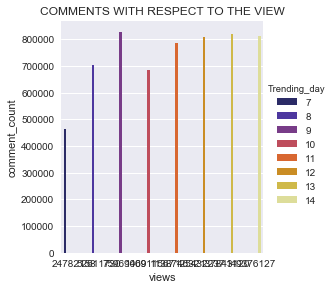

In [33]:
#comments with respect to the view
sb.set(rc={'figure.figsize':(25,25)})
sb.factorplot(x="views",y="comment_count",hue="Trending_day",data=insight_most_watched,kind="bar",palette="CMRmap")
plt.title("COMMENTS WITH RESPECT TO THE VIEW")

Text(0.5,1,'VIEWS WITH RESPECT TO THE DAY OF THE WEEK')

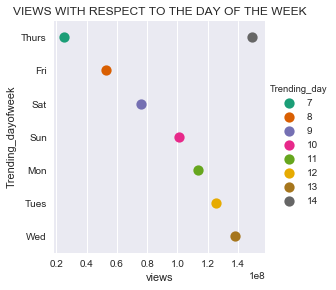

In [34]:
#views with respect to the day of week
sb.factorplot(x="views",y="Trending_dayofweek",hue="Trending_day",data=insight_most_watched,kinda="bar",palette="Dark2")
plt.title('VIEWS WITH RESPECT TO THE DAY OF THE WEEK')

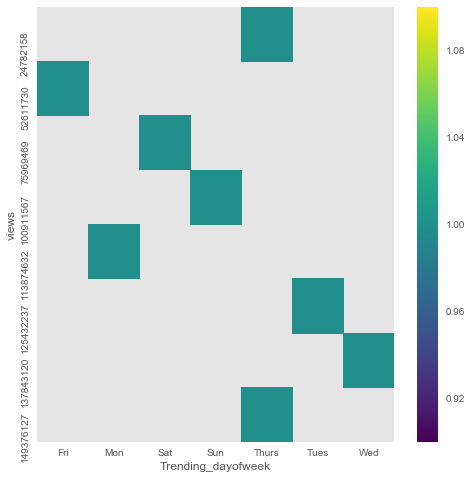

In [35]:
#to visualize in heat map
plt.style.use('ggplot')

trend_day_week = insight_most_watched.groupby(["views","Trending_dayofweek"]).count()["title"].unstack()
plt.figure(figsize=(8,8))
sb.heatmap(trend_day_week,cmap='viridis')

As we can see from the above heatmap,**Thursday** the video get start trending and reached 1.00M views and after thursday the video views slightly increasing and then video stopped trending on **Thursday** and reached around 24M views

C:\Users\Madhivarman\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'RELATION BETWEEN TRENDING DAY AND DISLIKE')

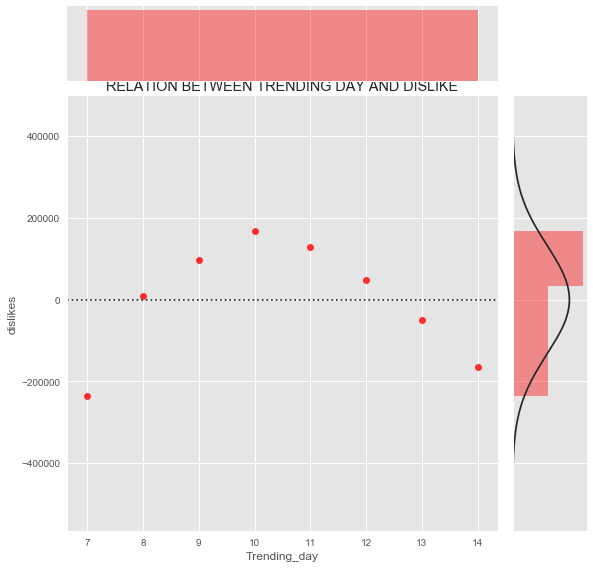

In [36]:
#relation between trendingdate and dislike
sb.jointplot(x="Trending_day",y="dislikes",data=insight_most_watched,kind='resid',size=8,color='red')
plt.title("RELATION BETWEEN TRENDING DAY AND DISLIKE")

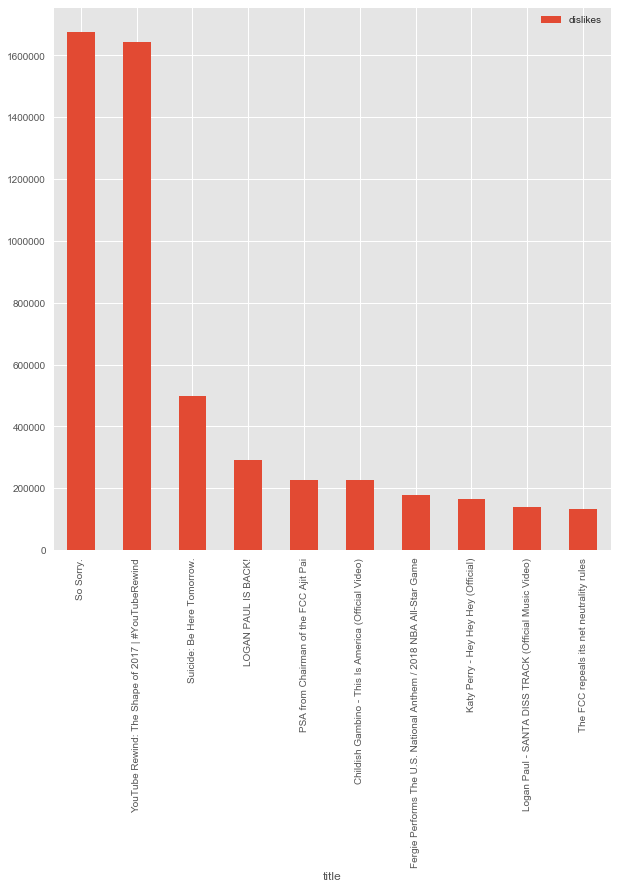

In [37]:
#analyze most disliked video
most_dislike_video = data_US_region[["title","dislikes"]].sort_values("dislikes",ascending=True)
most_dislike_video.drop_duplicates("title",keep="last",inplace=True)

most_dislike_video = most_dislike_video.sort_values("dislikes",ascending=False).head(10) #top 10 most disliked video
most_dislike_video.set_index("title",inplace=True)
sb.set(rc={"figure.figsize":(10,10)})
plt.style.use('ggplot')
most_dislike_video.plot.bar() #as we can see {so sorry,youtube rewind shape of 2017} is most disliked video

Text(0.5,1,'TRENDING DAYS V/S LIKES')

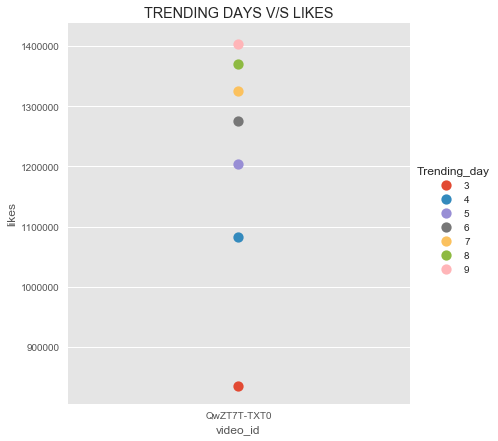

In [38]:
#lets get more insight about so sorry

insights_about_dislike = data_US_region[data_US_region["title"].str.match("So Sorry")]
sb.factorplot(x="video_id",y="likes",hue="Trending_day",data=insights_about_dislike,size=6,kind="point")
plt.title('TRENDING DAYS V/S LIKES')

C:\Users\Madhivarman\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


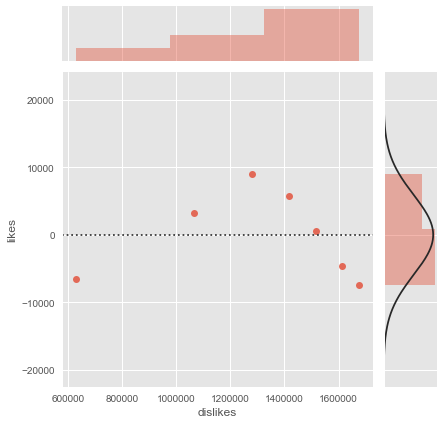

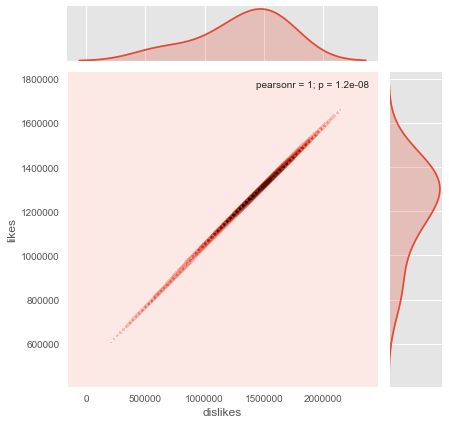

In [39]:
plt.style.use('ggplot')
sb.jointplot(x="dislikes",y="likes",data=insights_about_dislike,kind='resid')
sb.jointplot(x="dislikes",y="likes",data=insights_about_dislike,kind='kde')

We can see that, Likes and dislikes have a **curvilinear** relation between them.

Text(0.5,1,'DISLIKE INCREASE WITH RESPECT TO TRENDING DAYS')

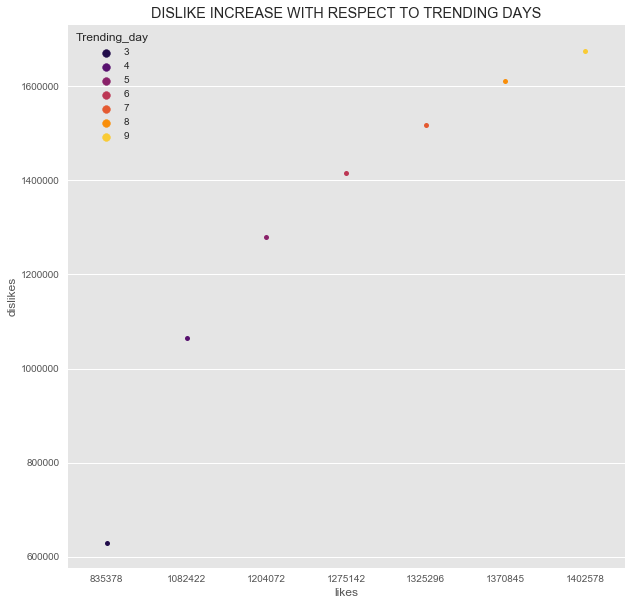

In [40]:
sb.swarmplot(x="likes",y="dislikes",hue="Trending_day",data=insights_about_dislike,palette="inferno")
plt.title("DISLIKE INCREASE WITH RESPECT TO TRENDING DAYS")

Text(0.5,1,'COMMENT WITH DISLIKES')

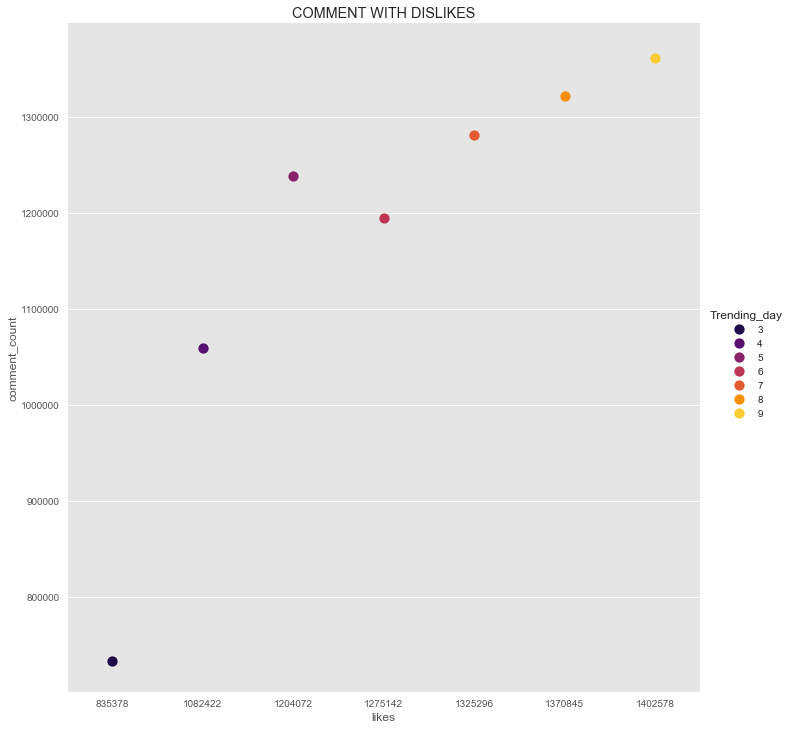

In [41]:
#now lets analyse the comment counts
plt.style.use('ggplot')
sb.factorplot(x="likes",y="comment_count",hue="Trending_day",data=insights_about_dislike,kind='point',size=10,palette="inferno")
plt.title("COMMENT WITH DISLIKES") #comment is dropped on 6th day and after increases gradually

Text(0.5,1,'COMPARING LIKES AND DISLIKES WITH TRENDING DAYS')

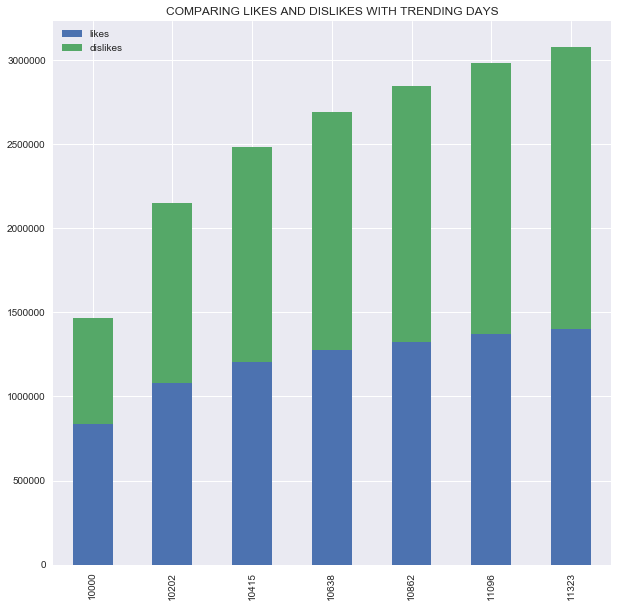

In [42]:
sb.set(rc={"figure.figsize":(10,10)})
insights_about_dislike[["likes","dislikes"]].plot.bar(stacked=True)
plt.title("COMPARING LIKES AND DISLIKES WITH TRENDING DAYS")

Now we have analysed the Trending_days, likes, dislikes, published_year, correlation. Now Following code will further analyse the frequency term,top trending channels, sentiment Analysis

Text(0.5,1,'TOP 5 TRENDING CHANNELS')

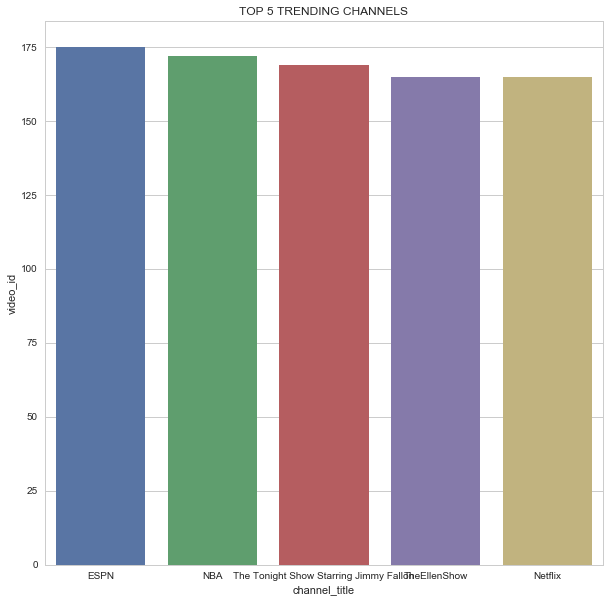

In [44]:
#analyse trending channels

top_trending_channels = data_US_region.groupby(by=["channel_title"],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sb.set_style('whitegrid')
sb.barplot(x='channel_title',y='video_id',data=top_trending_channels)
plt.title('TOP 5 TRENDING CHANNELS')

In [47]:
#to count the frequency of words in the Tag column
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

top_N = 100
stop_words = set(stopwords.words('english'))
tags_lower = data_US_region["tags"].str.lower().str.cat(sep=' ')

tags_remove_pun = re.sub('[^A-Za-z]+',' ',tags_lower) #remove punctuations and expressions from the tag

word_token_tags = word_tokenize(tags_remove_pun)
filtered_sentence = [w for w in word_token_tags if not w in stop_words]

In [48]:
len(filtered_sentence)

1147745

In [49]:
#preprocessing done: remove characters which have length of 2 they are meaningless
meaningfull_characters = [words for words in filtered_sentence if len(words) > 2]
len(meaningfull_characters)

1111329

In [50]:
#remove numbers
remove_numerical_data = [words for words in meaningfull_characters if not words.isnumeric()]
len(remove_numerical_data)

1111329

In [52]:
#now calculate frequency distribution
import nltk 
word_dist_tags = nltk.FreqDist(remove_numerical_data)
mst_cmn = pd.DataFrame(word_dist_tags.most_common(top_N),columns=['word','Frequency'])

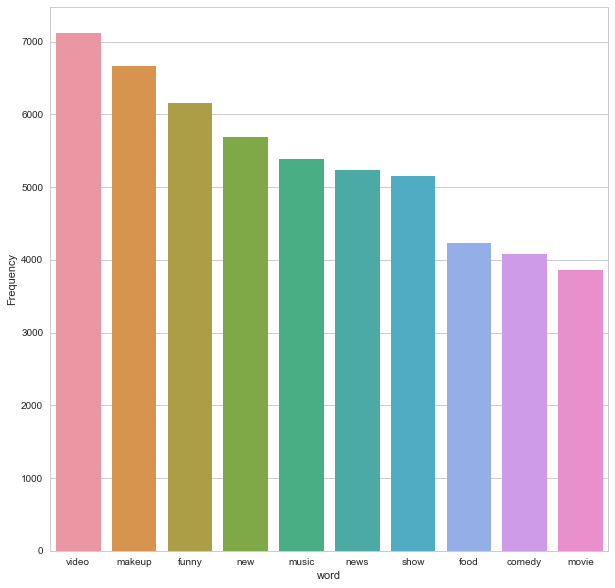

In [57]:
plt.figure(figsize=(10,10))
sb.set_style('whitegrid')
sb.barplot(x='word',y='Frequency',data=mst_cmn.head(10)) #we can do the same procedure with description tags

Text(0.5,1,'SENTIMENT ANALYSIS OF WORDS IN DESCRIPTION')

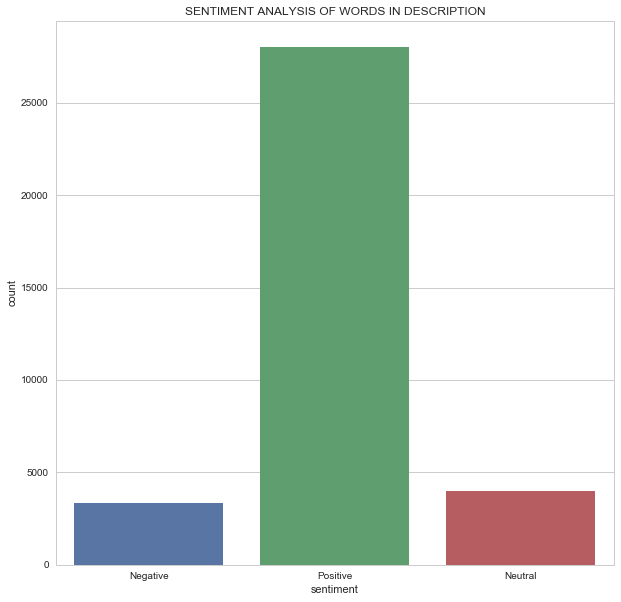

In [68]:
#now calculate sentiment analysis for description

from textblob import TextBlob

sentiment_list = list()

description = data_US_region["description"].astype(str)

for desc in description:
    blob = TextBlob(desc)
    sentiment_list.append((desc,blob.sentiment.polarity,blob.sentiment.subjectivity))
    polarity_df = pd.DataFrame(sentiment_list,columns=['sentence','sentiment','polarity'])


def f(polarity_df):
    
    if polarity_df['sentiment'] > 0:
        val = 'Positive'
    elif polarity_df['sentiment'] == 0:
        val = 'Neutral'
    else:
        val = 'Negative'
    
    return val
    
polarity_df['sentiment'] = polarity_df.apply(f,axis=1)
sb.set_style('whitegrid')
sb.countplot(x='sentiment',data=polarity_df)
plt.title('SENTIMENT ANALYSIS OF WORDS IN DESCRIPTION')